In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import wikipedia
from wiki_topic import miscel
from wiki_topic import rule

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# time analysis

In [73]:
data_path = 'train_2_topic_and_time.csv'
df_time = pd.read_csv(data_path)
df_time.head()

,Page,title,topic,score,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,!vote_en.wikipedia.org_desktop_all-agents,!vote,Philosophy and thinking,0.179978,3.0,4.0,7.0,4.0,4.0,2.0,...,8.0,6.0,4.0,5.0,4.0,2.0,2.0,9.0,3.0,3.0
1,"""Awaken,_My_Love!""_en.wikipedia.org_desktop_al...","""Awaken,_My_Love!""",Art and culture,0.166252,NaN,NaN,NaN,NaN,NaN,NaN,...,608.0,551.0,582.0,631.0,617.0,684.0,649.0,640.0,498.0,546.0
2,"""European_Society_for_Clinical_Investigation""_...","""European_Society_for_Clinical_Investigation""",Social sciences and society,0.531681,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN
3,"""Weird_Al""_Yankovic_en.wikipedia.org_desktop_a...","""Weird_Al""_Yankovic",Art and culture,0.183592,2403.0,20136.0,1850.0,1432.0,1351.0,1792.0,...,1336.0,1106.0,1309.0,1334.0,1381.0,1370.0,2041.0,1381.0,1084.0,1157.0
4,100_metres_en.wikipedia.org_desktop_all-agents,100_metres,History and events,0.155705,982.0,881.0,794.0,979.0,1191.0,1057.0,...,436.0,374.0,422.0,467.0,641.0,525.0,490.0,580.0,539.0,496.0


In [75]:
df_time.topic.value_counts()

History and events                 7160
-1                                 6341
Art and culture                    4112
People and self                    2062
Geography and places               1754
Philosophy and thinking            1075
Technology and applied sciences     339
Health and fitness                  331
Mathematics and abstractions        324
Religion and spirituality           306
Social sciences and society         173
Natural sciences and nature         140
Name: topic, dtype: int64

## topic trend

In [76]:
df_exclude_none = df_time[df_time['topic'] != '-1']
df_exclude_none.topic.value_counts()

History and events                 7160
Art and culture                    4112
People and self                    2062
Geography and places               1754
Philosophy and thinking            1075
Technology and applied sciences     339
Health and fitness                  331
Mathematics and abstractions        324
Religion and spirituality           306
Social sciences and society         173
Natural sciences and nature         140
Name: topic, dtype: int64

In [87]:
df_time[df_time['topic'] == 'Philosophy and thinking']

,Page,title,topic,score,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,!vote_en.wikipedia.org_desktop_all-agents,!vote,Philosophy and thinking,0.179978,3.0,4.0,7.0,4.0,4.0,2.0,...,8.0,6.0,4.0,5.0,4.0,2.0,2.0,9.0,3.0,3.0
85,4_Your_Eyez_Only_en.wikipedia.org_desktop_all-...,4_Your_Eyez_Only,Philosophy and thinking,0.199424,NaN,NaN,NaN,NaN,NaN,NaN,...,482.0,441.0,387.0,426.0,423.0,419.0,401.0,420.0,320.0,333.0
101,A_Song_of_Ice_and_Fire_en.wikipedia.org_deskto...,A_Song_of_Ice_and_Fire,Philosophy and thinking,0.182003,9554.0,9147.0,7235.0,6426.0,7307.0,9832.0,...,14181.0,10488.0,10298.0,12013.0,11982.0,10090.0,8590.0,7393.0,5640.0,6211.0
125,Alaska_en.wikipedia.org_desktop_all-agents,Alaska,Philosophy and thinking,0.124680,4590.0,3545.0,3294.0,2885.0,3180.0,3804.0,...,3048.0,2174.0,2571.0,2866.0,3570.0,3607.0,4851.0,3061.0,2352.0,2451.0
127,Albert_Einstein_en.wikipedia.org_desktop_all-a...,Albert_Einstein,Philosophy and thinking,0.133741,8398.0,8600.0,7474.0,5900.0,6835.0,8387.0,...,6416.0,5201.0,6433.0,6880.0,8544.0,8397.0,9443.0,7724.0,5414.0,6486.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23971,Weighted_network_en.wikipedia.org_all-access_a...,Weighted_network,Philosophy and thinking,0.150484,26.0,34.0,16.0,30.0,25.0,33.0,...,38.0,23.0,32.0,50.0,57.0,34.0,32.0,43.0,31.0,27.0
24037,Wong_Sai_Hou_en.wikipedia.org_all-access_all-a...,Wong_Sai_Hou,Philosophy and thinking,0.172407,1.0,2.0,1.0,2.0,4.0,3.0,...,6.0,2.0,11.0,6.0,3.0,9.0,3.0,5.0,8.0,4.0
24046,Wyllie_en.wikipedia.org_all-access_all-agents,Wyllie,Philosophy and thinking,0.141981,7.0,4.0,5.0,12.0,6.0,7.0,...,6.0,8.0,14.0,10.0,19.0,8.0,5.0,20.0,8.0,11.0
24065,Yeh_Raat_Phir_Na_Aayegi_en.wikipedia.org_all-a...,Yeh_Raat_Phir_Na_Aayegi,Philosophy and thinking,0.184343,NaN,NaN,NaN,NaN,NaN,NaN,...,35.0,33.0,29.0,34.0,32.0,55.0,37.0,35.0,44.0,48.0


In [77]:
time_col = df_exclude_none.columns[4:]
time_col

Index(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05',
       '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
       ...
       '2017-09-01', '2017-09-02', '2017-09-03', '2017-09-04', '2017-09-05',
       '2017-09-06', '2017-09-07', '2017-09-08', '2017-09-09', '2017-09-10'],
      dtype='object', length=803)

In [78]:
sum_topic = df_exclude_none.groupby('topic')[time_col].sum()
sum_topic

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
topic,,,,,,,,,,,,,,,,,,,,,
Art and culture,6874280.0,6463865.0,6196939.0,6445894.0,7134577.0,7375267.0,6755110.0,6885531.0,6863078.0,6589085.0,...,6239128.0,6767420.0,7774027.0,7681499.0,6901264.0,6825031.0,7157992.0,6825058.0,7564173.0,7084305.0
Geography and places,1378243.0,1326034.0,1300892.0,1269563.0,1351177.0,1510856.0,1452849.0,1410292.0,1438624.0,1390226.0,...,1587990.0,1357348.0,1539230.0,1678319.0,1623544.0,1760463.0,2483077.0,1305989.0,1276112.0,1170678.0
Health and fitness,306265.0,231861.0,202919.0,198817.0,248417.0,285345.0,239438.0,252361.0,235142.0,217145.0,...,177100.0,180414.0,203874.0,196921.0,196802.0,178916.0,182026.0,165220.0,158080.0,137498.0
History and events,8685278.0,8291332.0,8241013.0,8837216.0,9496376.0,10311213.0,8911837.0,8592232.0,8461301.0,8363298.0,...,9769727.0,10257763.0,11452553.0,11790644.0,11538105.0,10685982.0,10528270.0,9764911.0,9487317.0,8943971.0
Mathematics and abstractions,357326.0,361807.0,276733.0,242418.0,268474.0,360356.0,320262.0,314362.0,297538.0,287840.0,...,312101.0,287958.0,341565.0,376681.0,334716.0,350155.0,400608.0,306881.0,267991.0,336160.0
Natural sciences and nature,104900.0,91863.0,79998.0,77263.0,94031.0,93186.0,107565.0,93479.0,93937.0,88634.0,...,110046.0,85280.0,100516.0,144340.0,105940.0,111754.0,140111.0,85884.0,76820.0,78689.0
People and self,4230933.0,4134408.0,3975953.0,4085122.0,4542233.0,4558396.0,4568149.0,4757665.0,5238354.0,4798025.0,...,4579630.0,4953913.0,6041350.0,5745782.0,4658113.0,4668224.0,5177557.0,4159756.0,4240109.0,3817506.0
Philosophy and thinking,6108773.0,5991634.0,5344186.0,4992686.0,5353427.0,6334196.0,6417601.0,6095296.0,6672907.0,6002700.0,...,6552909.0,6336468.0,7263551.0,7687733.0,7888678.0,7609137.0,8183742.0,5832354.0,5401568.0,5676871.0
Religion and spirituality,243164.0,483378.0,301668.0,236494.0,240169.0,249283.0,243668.0,246820.0,246198.0,234590.0,...,593387.0,409287.0,320571.0,309903.0,311690.0,301801.0,342558.0,257307.0,241736.0,232305.0


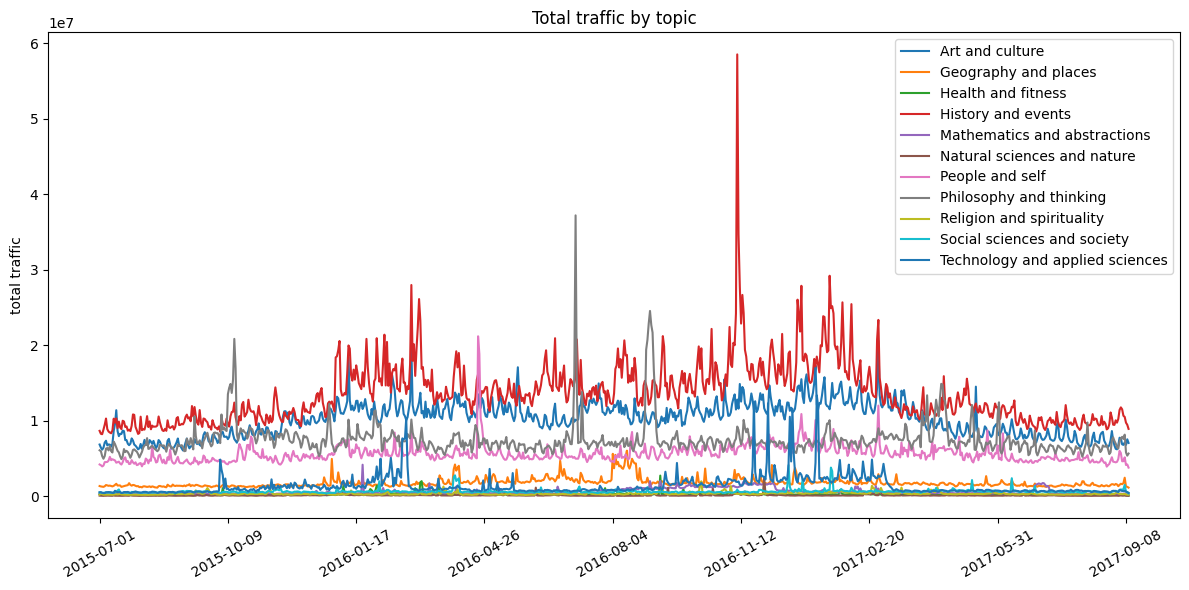

In [85]:
plt.figure(figsize=(12, 6))
for topic in sum_topic.index:
    sum_topic.loc[topic].plot()
plt.ylabel('total traffic')
plt.xticks(rotation=30)
plt.title('Total traffic by topic')
plt.legend()
plt.tight_layout()
plt.show()

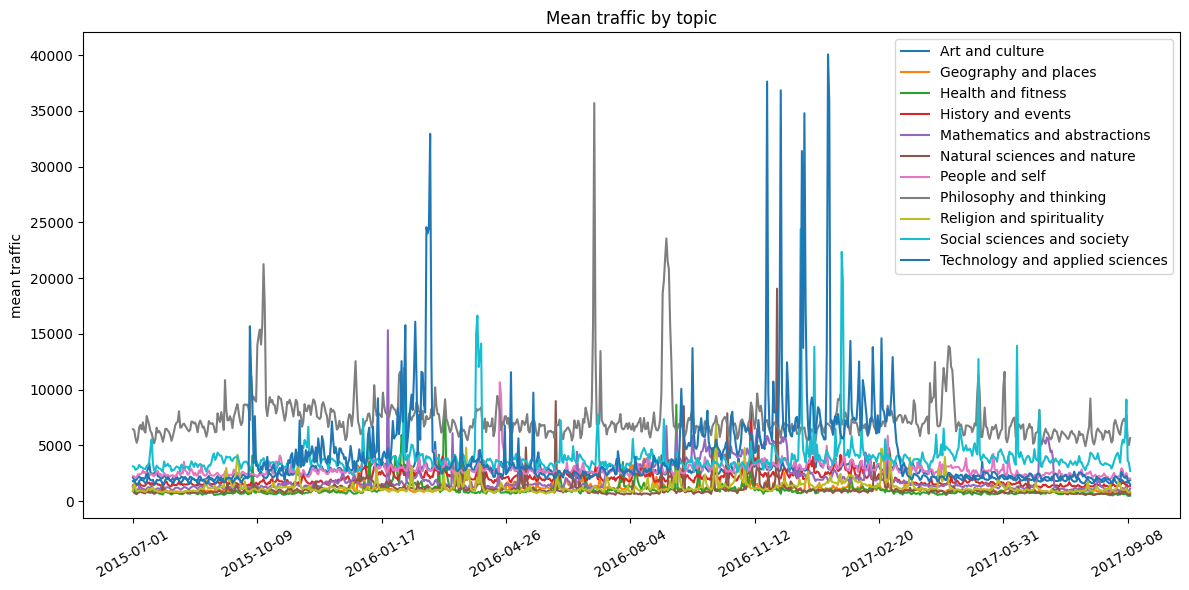

In [86]:
mean_topic = df_exclude_none.groupby('topic')[time_col].mean()

plt.figure(figsize=(12, 6))
for topic in mean_topic.index:
    mean_topic.loc[topic].plot()
plt.ylabel('mean traffic')
plt.xticks(rotation=30)
plt.title('Mean traffic by topic')
plt.legend()
plt.tight_layout()
plt.show()

# merge time

In [47]:
train_path = 'web_traffic_data/train_2.csv'
topic_path = 'train_1_topic.csv'
df_train = pd.read_csv(train_path)
df_topic = pd.read_csv(topic_path)
df_train['Page'] = df_train['Page'].astype(str)
df_topic['Page'] = df_topic['Page'].astype(str)

In [48]:
df_train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0


In [54]:
df_topic.head()

,Page,title,topic,score,summary
0,!vote_en.wikipedia.org_desktop_all-agents,!vote,Philosophy and thinking,0.179978,"In logic, negation, also called the logical co..."
1,"""Awaken,_My_Love!""_en.wikipedia.org_desktop_al...","""Awaken,_My_Love!""",Art and culture,0.166252,"""Awaken, My Love!"" is the third studio album b..."
2,"""European_Society_for_Clinical_Investigation""_...","""European_Society_for_Clinical_Investigation""",Social sciences and society,0.531681,The European Society for Clinical Investigatio...
3,"""Weird_Al""_Yankovic_en.wikipedia.org_desktop_a...","""Weird_Al""_Yankovic",Art and culture,0.183592,"Alfred Matthew ""Weird Al"" Yankovic ( YANG-kə-v..."
4,100_metres_en.wikipedia.org_desktop_all-agents,100_metres,History and events,0.155705,The following are examples of orders of magnit...


In [55]:
time_cols = df_train.columns[1:]
time_cols

Index(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05',
       '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
       ...
       '2017-09-01', '2017-09-02', '2017-09-03', '2017-09-04', '2017-09-05',
       '2017-09-06', '2017-09-07', '2017-09-08', '2017-09-09', '2017-09-10'],
      dtype='object', length=803)

In [56]:
df_train_en = df_train[df_train['Page'].str.contains("_en\.")]
df_train_en.tail()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
113946,Zikanyrops_sparsa_en.wikipedia.org_all-access_...,1.0,5.0,2.0,2.0,NaN,1.0,NaN,NaN,2.0,...,NaN,1.0,NaN,NaN,1.0,2.0,NaN,2.0,2.0,NaN
113947,Zillur_Rahman_John_en.wikipedia.org_all-access...,7.0,9.0,3.0,6.0,4.0,2.0,6.0,7.0,6.0,...,5.0,4.0,4.0,6.0,5.0,6.0,5.0,6.0,7.0,5.0
113948,Zitadelle_en.wikipedia.org_all-access_all-agents,10.0,6.0,4.0,8.0,13.0,5.0,9.0,5.0,4.0,...,7.0,8.0,4.0,2.0,7.0,6.0,4.0,12.0,3.0,5.0
113949,"Zovashen_(Dzhannatlu),_Ararat_en.wikipedia.org...",NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,...,12.0,10.0,8.0,6.0,4.0,4.0,5.0,6.0,6.0,9.0
113950,Zurich.minds_en.wikipedia.org_all-access_all-a...,8.0,5.0,7.0,13.0,8.0,13.0,9.0,7.0,8.0,...,2.0,4.0,6.0,8.0,4.0,5.0,5.0,8.0,8.0,4.0


In [57]:
df_topic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24117 entries, 0 to 24116
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Page     24117 non-null  object 
 1   title    24117 non-null  object 
 2   topic    24117 non-null  object 
 3   score    24117 non-null  float64
 4   summary  24117 non-null  object 
dtypes: float64(1), object(4)
memory usage: 942.2+ KB


In [58]:
df_train_en.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
8357,!vote_en.wikipedia.org_desktop_all-agents,3.0,4.0,7.0,4.0,4.0,2.0,3.0,7.0,2.0,...,8.0,6.0,4.0,5.0,4.0,2.0,2.0,9.0,3.0,3.0
8358,"""Awaken,_My_Love!""_en.wikipedia.org_desktop_al...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,608.0,551.0,582.0,631.0,617.0,684.0,649.0,640.0,498.0,546.0
8359,"""European_Society_for_Clinical_Investigation""_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN
8360,"""Weird_Al""_Yankovic_en.wikipedia.org_desktop_a...",2403.0,20136.0,1850.0,1432.0,1351.0,1792.0,1710.0,2039.0,1957.0,...,1336.0,1106.0,1309.0,1334.0,1381.0,1370.0,2041.0,1381.0,1084.0,1157.0
8361,100_metres_en.wikipedia.org_desktop_all-agents,982.0,881.0,794.0,979.0,1191.0,1057.0,1184.0,860.0,1259.0,...,436.0,374.0,422.0,467.0,641.0,525.0,490.0,580.0,539.0,496.0


In [59]:
df_train_en

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
8357,!vote_en.wikipedia.org_desktop_all-agents,3.0,4.0,7.0,4.0,4.0,2.0,3.0,7.0,2.0,...,8.0,6.0,4.0,5.0,4.0,2.0,2.0,9.0,3.0,3.0
8358,"""Awaken,_My_Love!""_en.wikipedia.org_desktop_al...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,608.0,551.0,582.0,631.0,617.0,684.0,649.0,640.0,498.0,546.0
8359,"""European_Society_for_Clinical_Investigation""_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN
8360,"""Weird_Al""_Yankovic_en.wikipedia.org_desktop_a...",2403.0,20136.0,1850.0,1432.0,1351.0,1792.0,1710.0,2039.0,1957.0,...,1336.0,1106.0,1309.0,1334.0,1381.0,1370.0,2041.0,1381.0,1084.0,1157.0
8361,100_metres_en.wikipedia.org_desktop_all-agents,982.0,881.0,794.0,979.0,1191.0,1057.0,1184.0,860.0,1259.0,...,436.0,374.0,422.0,467.0,641.0,525.0,490.0,580.0,539.0,496.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113946,Zikanyrops_sparsa_en.wikipedia.org_all-access_...,1.0,5.0,2.0,2.0,NaN,1.0,NaN,NaN,2.0,...,NaN,1.0,NaN,NaN,1.0,2.0,NaN,2.0,2.0,NaN
113947,Zillur_Rahman_John_en.wikipedia.org_all-access...,7.0,9.0,3.0,6.0,4.0,2.0,6.0,7.0,6.0,...,5.0,4.0,4.0,6.0,5.0,6.0,5.0,6.0,7.0,5.0
113948,Zitadelle_en.wikipedia.org_all-access_all-agents,10.0,6.0,4.0,8.0,13.0,5.0,9.0,5.0,4.0,...,7.0,8.0,4.0,2.0,7.0,6.0,4.0,12.0,3.0,5.0
113949,"Zovashen_(Dzhannatlu),_Ararat_en.wikipedia.org...",NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,...,12.0,10.0,8.0,6.0,4.0,4.0,5.0,6.0,6.0,9.0


In [60]:
df_topic[time_cols] = df_train_en.reset_index()[time_cols].copy()

/tmp/ipykernel_8767/2620494074.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_topic[time_cols] = df_train_en.reset_index()[time_cols].copy()
/tmp/ipykernel_8767/2620494074.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_topic[time_cols] = df_train_en.reset_index()[time_cols].copy()
/tmp/ipykernel_8767/2620494074.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat

In [61]:
df_topic

,Page,title,topic,score,summary,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,!vote_en.wikipedia.org_desktop_all-agents,!vote,Philosophy and thinking,0.179978,"In logic, negation, also called the logical co...",3.0,4.0,7.0,4.0,4.0,...,8.0,6.0,4.0,5.0,4.0,2.0,2.0,9.0,3.0,3.0
1,"""Awaken,_My_Love!""_en.wikipedia.org_desktop_al...","""Awaken,_My_Love!""",Art and culture,0.166252,"""Awaken, My Love!"" is the third studio album b...",NaN,NaN,NaN,NaN,NaN,...,608.0,551.0,582.0,631.0,617.0,684.0,649.0,640.0,498.0,546.0
2,"""European_Society_for_Clinical_Investigation""_...","""European_Society_for_Clinical_Investigation""",Social sciences and society,0.531681,The European Society for Clinical Investigatio...,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN
3,"""Weird_Al""_Yankovic_en.wikipedia.org_desktop_a...","""Weird_Al""_Yankovic",Art and culture,0.183592,"Alfred Matthew ""Weird Al"" Yankovic ( YANG-kə-v...",2403.0,20136.0,1850.0,1432.0,1351.0,...,1336.0,1106.0,1309.0,1334.0,1381.0,1370.0,2041.0,1381.0,1084.0,1157.0
4,100_metres_en.wikipedia.org_desktop_all-agents,100_metres,History and events,0.155705,The following are examples of orders of magnit...,982.0,881.0,794.0,979.0,1191.0,...,436.0,374.0,422.0,467.0,641.0,525.0,490.0,580.0,539.0,496.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24112,Zikanyrops_sparsa_en.wikipedia.org_all-access_...,Zikanyrops_sparsa,-1,-1.000000,-1,1.0,5.0,2.0,2.0,NaN,...,NaN,1.0,NaN,NaN,1.0,2.0,NaN,2.0,2.0,NaN
24113,Zillur_Rahman_John_en.wikipedia.org_all-access...,Zillur_Rahman_John,-1,-1.000000,-1,7.0,9.0,3.0,6.0,4.0,...,5.0,4.0,4.0,6.0,5.0,6.0,5.0,6.0,7.0,5.0
24114,Zitadelle_en.wikipedia.org_all-access_all-agents,Zitadelle,-1,-1.000000,-1,10.0,6.0,4.0,8.0,13.0,...,7.0,8.0,4.0,2.0,7.0,6.0,4.0,12.0,3.0,5.0
24115,"Zovashen_(Dzhannatlu),_Ararat_en.wikipedia.org...","Zovashen_(Dzhannatlu),_Ararat",-1,-1.000000,-1,NaN,NaN,1.0,1.0,1.0,...,12.0,10.0,8.0,6.0,4.0,4.0,5.0,6.0,6.0,9.0


In [62]:
df_topic = df_topic.drop('summary', axis=1)

In [70]:
df_topic['Page'] = df_train_en.reset_index()['Page']

In [72]:
df_topic.to_csv('train_2_topic_and_time.csv', index=False)

In [71]:
df_topic

,Page,title,topic,score,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,!vote_en.wikipedia.org_desktop_all-agents,!vote,Philosophy and thinking,0.179978,3.0,4.0,7.0,4.0,4.0,2.0,...,8.0,6.0,4.0,5.0,4.0,2.0,2.0,9.0,3.0,3.0
1,"""Awaken,_My_Love!""_en.wikipedia.org_desktop_al...","""Awaken,_My_Love!""",Art and culture,0.166252,NaN,NaN,NaN,NaN,NaN,NaN,...,608.0,551.0,582.0,631.0,617.0,684.0,649.0,640.0,498.0,546.0
2,"""European_Society_for_Clinical_Investigation""_...","""European_Society_for_Clinical_Investigation""",Social sciences and society,0.531681,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN
3,"""Weird_Al""_Yankovic_en.wikipedia.org_desktop_a...","""Weird_Al""_Yankovic",Art and culture,0.183592,2403.0,20136.0,1850.0,1432.0,1351.0,1792.0,...,1336.0,1106.0,1309.0,1334.0,1381.0,1370.0,2041.0,1381.0,1084.0,1157.0
4,100_metres_en.wikipedia.org_desktop_all-agents,100_metres,History and events,0.155705,982.0,881.0,794.0,979.0,1191.0,1057.0,...,436.0,374.0,422.0,467.0,641.0,525.0,490.0,580.0,539.0,496.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24112,Zikanyrops_sparsa_en.wikipedia.org_all-access_...,Zikanyrops_sparsa,-1,-1.000000,1.0,5.0,2.0,2.0,NaN,1.0,...,NaN,1.0,NaN,NaN,1.0,2.0,NaN,2.0,2.0,NaN
24113,Zillur_Rahman_John_en.wikipedia.org_all-access...,Zillur_Rahman_John,-1,-1.000000,7.0,9.0,3.0,6.0,4.0,2.0,...,5.0,4.0,4.0,6.0,5.0,6.0,5.0,6.0,7.0,5.0
24114,Zitadelle_en.wikipedia.org_all-access_all-agents,Zitadelle,-1,-1.000000,10.0,6.0,4.0,8.0,13.0,5.0,...,7.0,8.0,4.0,2.0,7.0,6.0,4.0,12.0,3.0,5.0
24115,"Zovashen_(Dzhannatlu),_Ararat_en.wikipedia.org...","Zovashen_(Dzhannatlu),_Ararat",-1,-1.000000,NaN,NaN,1.0,1.0,1.0,1.0,...,12.0,10.0,8.0,6.0,4.0,4.0,5.0,6.0,6.0,9.0


In [66]:
df_train_en

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
8357,!vote_en.wikipedia.org_desktop_all-agents,3.0,4.0,7.0,4.0,4.0,2.0,3.0,7.0,2.0,...,8.0,6.0,4.0,5.0,4.0,2.0,2.0,9.0,3.0,3.0
8358,"""Awaken,_My_Love!""_en.wikipedia.org_desktop_al...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,608.0,551.0,582.0,631.0,617.0,684.0,649.0,640.0,498.0,546.0
8359,"""European_Society_for_Clinical_Investigation""_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN
8360,"""Weird_Al""_Yankovic_en.wikipedia.org_desktop_a...",2403.0,20136.0,1850.0,1432.0,1351.0,1792.0,1710.0,2039.0,1957.0,...,1336.0,1106.0,1309.0,1334.0,1381.0,1370.0,2041.0,1381.0,1084.0,1157.0
8361,100_metres_en.wikipedia.org_desktop_all-agents,982.0,881.0,794.0,979.0,1191.0,1057.0,1184.0,860.0,1259.0,...,436.0,374.0,422.0,467.0,641.0,525.0,490.0,580.0,539.0,496.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113946,Zikanyrops_sparsa_en.wikipedia.org_all-access_...,1.0,5.0,2.0,2.0,NaN,1.0,NaN,NaN,2.0,...,NaN,1.0,NaN,NaN,1.0,2.0,NaN,2.0,2.0,NaN
113947,Zillur_Rahman_John_en.wikipedia.org_all-access...,7.0,9.0,3.0,6.0,4.0,2.0,6.0,7.0,6.0,...,5.0,4.0,4.0,6.0,5.0,6.0,5.0,6.0,7.0,5.0
113948,Zitadelle_en.wikipedia.org_all-access_all-agents,10.0,6.0,4.0,8.0,13.0,5.0,9.0,5.0,4.0,...,7.0,8.0,4.0,2.0,7.0,6.0,4.0,12.0,3.0,5.0
113949,"Zovashen_(Dzhannatlu),_Ararat_en.wikipedia.org...",NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,...,12.0,10.0,8.0,6.0,4.0,4.0,5.0,6.0,6.0,9.0


# merge to wiki topic

In [2]:
data_path = 'train_1_class_post_processing.csv'
df = pd.read_csv(data_path)
df

,Page,title,class,score,summary
0,!vote_en.wikipedia.org_desktop_all-agents,!vote,thinking,0.179978,"In logic, negation, also called the logical co..."
1,"""Awaken,_My_Love!""_en.wikipedia.org_desktop_al...","""Awaken,_My_Love!""",culture,0.166252,"""Awaken, My Love!"" is the third studio album b..."
2,"""European_Society_for_Clinical_Investigation""_...","""European_Society_for_Clinical_Investigation""",society,0.531681,The European Society for Clinical Investigatio...
3,"""Weird_Al""_Yankovic_en.wikipedia.org_desktop_a...","""Weird_Al""_Yankovic",culture,0.183592,"Alfred Matthew ""Weird Al"" Yankovic ( YANG-kə-v..."
4,100_metres_en.wikipedia.org_desktop_all-agents,100_metres,events,0.155705,The following are examples of orders of magnit...
...,...,...,...,...,...
24112,Zikanyrops_sparsa_en.wikipedia.org_all-access_...,Zikanyrops_sparsa,-1,-1.000000,-1
24113,Zillur_Rahman_John_en.wikipedia.org_all-access...,Zillur_Rahman_John,-1,-1.000000,-1
24114,Zitadelle_en.wikipedia.org_all-access_all-agents,Zitadelle,-1,-1.000000,-1
24115,"Zovashen_(Dzhannatlu),_Ararat_en.wikipedia.org...","Zovashen_(Dzhannatlu),_Ararat",-1,-1.000000,-1


In [5]:
df['topic'] = df['class'].replace(miscel.LABEL_TOPIC_MAP)
df

,Page,title,class,score,summary,topic
0,!vote_en.wikipedia.org_desktop_all-agents,!vote,thinking,0.179978,"In logic, negation, also called the logical co...",Philosophy and thinking
1,"""Awaken,_My_Love!""_en.wikipedia.org_desktop_al...","""Awaken,_My_Love!""",culture,0.166252,"""Awaken, My Love!"" is the third studio album b...",Art and culture
2,"""European_Society_for_Clinical_Investigation""_...","""European_Society_for_Clinical_Investigation""",society,0.531681,The European Society for Clinical Investigatio...,Social sciences and society
3,"""Weird_Al""_Yankovic_en.wikipedia.org_desktop_a...","""Weird_Al""_Yankovic",culture,0.183592,"Alfred Matthew ""Weird Al"" Yankovic ( YANG-kə-v...",Art and culture
4,100_metres_en.wikipedia.org_desktop_all-agents,100_metres,events,0.155705,The following are examples of orders of magnit...,History and events
...,...,...,...,...,...,...
24112,Zikanyrops_sparsa_en.wikipedia.org_all-access_...,Zikanyrops_sparsa,-1,-1.000000,-1,-1
24113,Zillur_Rahman_John_en.wikipedia.org_all-access...,Zillur_Rahman_John,-1,-1.000000,-1,-1
24114,Zitadelle_en.wikipedia.org_all-access_all-agents,Zitadelle,-1,-1.000000,-1,-1
24115,"Zovashen_(Dzhannatlu),_Ararat_en.wikipedia.org...","Zovashen_(Dzhannatlu),_Ararat",-1,-1.000000,-1,-1


In [7]:
df.columns

Index(['Page', 'title', 'class', 'score', 'summary', 'topic'], dtype='object')

In [8]:
df.to_csv('train_1_topic.csv', index=False, columns=['Page', 'title', 'topic', 'score', 'summary'])

# rules

In [109]:
data_path = 'train_1_class_bart.csv'
df = pd.read_csv(data_path)
df['lower_title'] = df['title'].str.lower()
df = miscel.extract_parentheses(df)
df.head()

,Page,title,class,score,summary,lower_title,parentheses
0,!vote_en.wikipedia.org_desktop_all-agents,!vote,thinking,0.179978,"In logic, negation, also called the logical co...",!vote,-1
1,"""Awaken,_My_Love!""_en.wikipedia.org_desktop_al...","""Awaken,_My_Love!""",culture,0.166252,"""Awaken, My Love!"" is the third studio album b...","""awaken,_my_love!""",-1
2,"""European_Society_for_Clinical_Investigation""_...","""European_Society_for_Clinical_Investigation""",society,0.531681,The European Society for Clinical Investigatio...,"""european_society_for_clinical_investigation""",-1
3,"""Weird_Al""_Yankovic_en.wikipedia.org_desktop_a...","""Weird_Al""_Yankovic",culture,0.183592,"Alfred Matthew ""Weird Al"" Yankovic ( YANG-kə-v...","""weird_al""_yankovic",-1
4,100_metres_en.wikipedia.org_desktop_all-agents,100_metres,events,0.155705,The following are examples of orders of magnit...,100_metres,-1


In [110]:
df = rule.apply_all_rules(df)

In [111]:
mask_null_class = df['class'] == '-1'
mask_parenthesis = df['parentheses'] != '-1'
df[mask_null_class & mask_parenthesis].head(50)

,Page,title,class,score,summary,lower_title,parentheses
129,Alex_(parrot)_en.wikipedia.org_desktop_all-agents,Alex_(parrot),-1,-1.0,-1,alex_(parrot),parrot
267,Batman_(Terry_McGinnis)_en.wikipedia.org_deskt...,Batman_(Terry_McGinnis),-1,-1.0,-1,batman_(terry_mcginnis),terry_mcginnis
373,"Burger_King_(Mattoon,_Illinois)_en.wikipedia.o...","Burger_King_(Mattoon,_Illinois)",-1,-1.0,-1,"burger_king_(mattoon,_illinois)","mattoon,_illinois"
494,Copacabana_(nightclub)_en.wikipedia.org_deskto...,Copacabana_(nightclub),-1,-1.0,-1,copacabana_(nightclub),nightclub
760,Fishsticks_(South_Park)_en.wikipedia.org_deskt...,Fishsticks_(South_Park),-1,-1.0,-1,fishsticks_(south_park),south_park
933,Hipster_(1940s_subculture)_en.wikipedia.org_de...,Hipster_(1940s_subculture),-1,-1.0,-1,hipster_(1940s_subculture),1940s_subculture
1156,K-factor_(marketing)_en.wikipedia.org_desktop_...,K-factor_(marketing),-1,-1.0,-1,k-factor_(marketing),marketing
1256,Libertarian_Party_(United_States)_en.wikipedia...,Libertarian_Party_(United_States),-1,-1.0,-1,libertarian_party_(united_states),united_states
1390,Loyalty_(monument)_en.wikipedia.org_desktop_al...,Loyalty_(monument),-1,-1.0,-1,loyalty_(monument),monument
1467,Matt_Ryan_(American_football)_en.wikipedia.org...,Matt_Ryan_(American_football),-1,-1.0,-1,matt_ryan_(american_football),american_football


In [114]:
df['class'].value_counts()

events              6973
-1                  6341
Art                 2312
culture             1800
places              1727
self                1298
thinking            1034
People               764
Technology           334
abstractions         275
fitness              239
Religion             229
History              187
society              167
nature               120
Health                92
spirituality          77
Mathematics           49
Philosophy            41
Geography             27
Natural sciences      20
Social sciences        6
applied sciences       5
Name: class, dtype: int64

In [113]:
df.to_csv('train_1_post_processing.csv', index=False,
           columns=['Page', 'title', 'class', 'score', 'summary'])

# parentheses

## film, season_

In [43]:
mask_film = df['parentheses'].str.contains('film|season_\d+')
df[mask_film]

,Page,title,class,score,summary,lower_title,parentheses
82,24_(2016_film)_en.wikipedia.org_desktop_all-ag...,24_(2016_film),Art,0.182780,24 is a 2016 Indian Tamil-language science fic...,24_(2016_film),2016_film
97,A_Monster_Calls_(film)_en.wikipedia.org_deskto...,A_Monster_Calls_(film),Art,0.229460,A Monster Calls is a 2016 dark fantasy drama f...,a_monster_calls_(film),film
113,Agent_Carter_(season_2)_en.wikipedia.org_deskt...,Agent_Carter_(season_2),Art,-1.000000,-1,agent_carter_(season_2),season_2
115,Agents_of_S.H.I.E.L.D._(season_4)_en.wikipedia...,Agents_of_S.H.I.E.L.D._(season_4),Art,-1.000000,-1,agents_of_s.h.i.e.l.d._(season_4),season_4
118,Airlift_(film)_en.wikipedia.org_desktop_all-ag...,Airlift_(film),Art,-1.000000,-1,airlift_(film),film
...,...,...,...,...,...,...,...
23659,The_Woman_in_Black_(2012_film)_en.wikipedia.or...,The_Woman_in_Black_(2012_film),Art,0.288437,The Woman in Black is a 2012 horror film direc...,the_woman_in_black_(2012_film),2012_film
23729,Top_of_the_Heap_(film)_en.wikipedia.org_all-ac...,Top_of_the_Heap_(film),Art,0.235815,Top of the Heap is a 1972 American drama film ...,top_of_the_heap_(film),film
23900,Video_on_Trial_(season_4)_en.wikipedia.org_all...,Video_on_Trial_(season_4),Art,0.169050,The fourth season of the Canadian television c...,video_on_trial_(season_4),season_4
24023,Winchell_(film)_en.wikipedia.org_all-access_al...,Winchell_(film),Art,-1.000000,-1,winchell_(film),film


## album

In [82]:
mask_album = df['parentheses'].str.contains('album')
df[mask_album]

,Page,title,class,score,summary,lower_title,parentheses
16,1989_(Taylor_Swift_album)_en.wikipedia.org_des...,1989_(Taylor_Swift_album),Art,-1.0,-1,1989_(taylor_swift_album),taylor_swift_album
17,1999_(Prince_album)_en.wikipedia.org_desktop_a...,1999_(Prince_album),Art,-1.0,-1,1999_(prince_album),prince_album
329,Blackstar_(David_Bowie_album)_en.wikipedia.org...,Blackstar_(David_Bowie_album),Art,-1.0,-1,blackstar_(david_bowie_album),david_bowie_album
336,Blonde_(Frank_Ocean_album)_en.wikipedia.org_de...,Blonde_(Frank_Ocean_album),Art,-1.0,-1,blonde_(frank_ocean_album),frank_ocean_album
339,Blue_&_Lonesome_(The_Rolling_Stones_album)_en....,Blue_&_Lonesome_(The_Rolling_Stones_album),Art,-1.0,-1,blue_&_lonesome_(the_rolling_stones_album),the_rolling_stones_album
...,...,...,...,...,...,...,...
23633,The_Performer_(Marty_Robbins_album)_en.wikiped...,The_Performer_(Marty_Robbins_album),Art,-1.0,-1,the_performer_(marty_robbins_album),marty_robbins_album
23655,The_Wayward_Bus_(album)_en.wikipedia.org_all-a...,The_Wayward_Bus_(album),Art,-1.0,The Wayward Bus is the second studio album by ...,the_wayward_bus_(album),album
23698,Timber_Timbre_(album)_en.wikipedia.org_all-acc...,Timber_Timbre_(album),Art,-1.0,Timber Timbre is the third studio album from T...,timber_timbre_(album),album
23708,Titan_(album)_en.wikipedia.org_all-access_all-...,Titan_(album),Art,-1.0,-1,titan_(album),album


# Olympics

In [15]:
mask_olympics = df['lower_title'].str.contains('olympics')
mask_null = df['class'] == '-1'
print(mask_olympics.sum(), mask_null.sum())
print((mask_olympics & mask_null).sum())

272 7618
42


In [16]:
df[mask_olympics & mask_null]

,Page,title,class,score,summary,lower_title
12,1936_Summer_Olympics_en.wikipedia.org_desktop_...,1936_Summer_Olympics,-1,-1.0,-1,1936_summer_olympics
13,1976_Summer_Olympics_en.wikipedia.org_desktop_...,1976_Summer_Olympics,-1,-1.0,-1,1976_summer_olympics
14,1980_Summer_Olympics_en.wikipedia.org_desktop_...,1980_Summer_Olympics,-1,-1.0,-1,1980_summer_olympics
15,1984_Summer_Olympics_en.wikipedia.org_desktop_...,1984_Summer_Olympics,-1,-1.0,-1,1984_summer_olympics
76,2018_Winter_Olympics_en.wikipedia.org_desktop_...,2018_Winter_Olympics,-1,-1.0,-1,2018_winter_olympics
78,2022_Winter_Olympics_en.wikipedia.org_desktop_...,2022_Winter_Olympics,-1,-1.0,-1,2022_winter_olympics
894,Gymnastics_at_the_2016_Summer_Olympics_en.wiki...,Gymnastics_at_the_2016_Summer_Olympics,-1,-1.0,-1,gymnastics_at_the_2016_summer_olympics
986,India_at_the_2008_Summer_Olympics_en.wikipedia...,India_at_the_2008_Summer_Olympics,-1,-1.0,-1,india_at_the_2008_summer_olympics
2542,2000_Summer_Olympics_medal_table_en.wikipedia....,2000_Summer_Olympics_medal_table,-1,-1.0,-1,2000_summer_olympics_medal_table
2543,2004_Summer_Olympics_medal_table_en.wikipedia....,2004_Summer_Olympics_medal_table,-1,-1.0,-1,2004_summer_olympics_medal_table


In [17]:
df = rule.rule_olympics(df)

In [23]:
df[mask_olympics & mask_null]

,Page,title,class,score,summary,lower_title
12,1936_Summer_Olympics_en.wikipedia.org_desktop_...,1936_Summer_Olympics,events,-1.0,-1,1936_summer_olympics
13,1976_Summer_Olympics_en.wikipedia.org_desktop_...,1976_Summer_Olympics,events,-1.0,-1,1976_summer_olympics
14,1980_Summer_Olympics_en.wikipedia.org_desktop_...,1980_Summer_Olympics,events,-1.0,-1,1980_summer_olympics
15,1984_Summer_Olympics_en.wikipedia.org_desktop_...,1984_Summer_Olympics,events,-1.0,-1,1984_summer_olympics
76,2018_Winter_Olympics_en.wikipedia.org_desktop_...,2018_Winter_Olympics,events,-1.0,-1,2018_winter_olympics
78,2022_Winter_Olympics_en.wikipedia.org_desktop_...,2022_Winter_Olympics,events,-1.0,-1,2022_winter_olympics
894,Gymnastics_at_the_2016_Summer_Olympics_en.wiki...,Gymnastics_at_the_2016_Summer_Olympics,events,-1.0,-1,gymnastics_at_the_2016_summer_olympics
986,India_at_the_2008_Summer_Olympics_en.wikipedia...,India_at_the_2008_Summer_Olympics,events,-1.0,-1,india_at_the_2008_summer_olympics
2542,2000_Summer_Olympics_medal_table_en.wikipedia....,2000_Summer_Olympics_medal_table,events,-1.0,-1,2000_summer_olympics_medal_table
2543,2004_Summer_Olympics_medal_table_en.wikipedia....,2004_Summer_Olympics_medal_table,events,-1.0,-1,2004_summer_olympics_medal_table


# predict all

In [15]:
summary_set = miscel.SummaryDataset('train_1_with_summary.csv')

In [17]:
len(summary_set)

24117

In [18]:
classifier = miscel.create_model()

In [19]:
rrr, sss = miscel.predict_all(classifier, summary_set, 8)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

In [25]:
df_class = summary_set.df.copy()
df_class['class'] = rrr
df_class['score'] = sss

In [26]:
df_class

,Page,title,summary,class,score
0,!vote_en.wikipedia.org_desktop_all-agents,!vote,"In logic, negation, also called the logical co...",thinking,0.179978
1,"""Awaken,_My_Love!""_en.wikipedia.org_desktop_al...","""Awaken,_My_Love!""","""Awaken, My Love!"" is the third studio album b...",culture,0.166252
2,"""European_Society_for_Clinical_Investigation""_...","""European_Society_for_Clinical_Investigation""",The European Society for Clinical Investigatio...,society,0.531681
3,"""Weird_Al""_Yankovic_en.wikipedia.org_desktop_a...","""Weird_Al""_Yankovic","Alfred Matthew ""Weird Al"" Yankovic ( YANG-kə-v...",culture,0.183592
4,100_metres_en.wikipedia.org_desktop_all-agents,100_metres,The following are examples of orders of magnit...,events,0.155705
...,...,...,...,...,...
24112,Zikanyrops_sparsa_en.wikipedia.org_all-access_...,Zikanyrops_sparsa,-1,self,0.281748
24113,Zillur_Rahman_John_en.wikipedia.org_all-access...,Zillur_Rahman_John,-1,self,0.281748
24114,Zitadelle_en.wikipedia.org_all-access_all-agents,Zitadelle,-1,self,0.281748
24115,"Zovashen_(Dzhannatlu),_Ararat_en.wikipedia.org...","Zovashen_(Dzhannatlu),_Ararat",-1,self,0.281748


In [29]:
df_class.loc[df_class['summary'] == '-1', ['class', 'score']] = -1

In [30]:
df_class

,Page,title,summary,class,score
0,!vote_en.wikipedia.org_desktop_all-agents,!vote,"In logic, negation, also called the logical co...",thinking,0.179978
1,"""Awaken,_My_Love!""_en.wikipedia.org_desktop_al...","""Awaken,_My_Love!""","""Awaken, My Love!"" is the third studio album b...",culture,0.166252
2,"""European_Society_for_Clinical_Investigation""_...","""European_Society_for_Clinical_Investigation""",The European Society for Clinical Investigatio...,society,0.531681
3,"""Weird_Al""_Yankovic_en.wikipedia.org_desktop_a...","""Weird_Al""_Yankovic","Alfred Matthew ""Weird Al"" Yankovic ( YANG-kə-v...",culture,0.183592
4,100_metres_en.wikipedia.org_desktop_all-agents,100_metres,The following are examples of orders of magnit...,events,0.155705
...,...,...,...,...,...
24112,Zikanyrops_sparsa_en.wikipedia.org_all-access_...,Zikanyrops_sparsa,-1,-1,-1.000000
24113,Zillur_Rahman_John_en.wikipedia.org_all-access...,Zillur_Rahman_John,-1,-1,-1.000000
24114,Zitadelle_en.wikipedia.org_all-access_all-agents,Zitadelle,-1,-1,-1.000000
24115,"Zovashen_(Dzhannatlu),_Ararat_en.wikipedia.org...","Zovashen_(Dzhannatlu),_Ararat",-1,-1,-1.000000


In [31]:

df_class.to_csv("train_1_class.csv", index=False, columns=['Page', 'title', 'class', 'score', 'summary'])

# merge summary

In [4]:
summary_1_1100 = 'temp_summary/temp_0_1100.csv'
summary_latter = 'temp_summary/temp_1100.csv'
df_summary_1_1100 = pd.read_csv(summary_1_1100)
df_summary_latter = pd.read_csv(summary_latter)

In [10]:
df_summary_all = df_summary_latter.copy()
df_summary_all.iloc[:1100] = df_summary_1_1100.iloc[:1100]

# check nan

df_summary_all.to_csv('train_1_with_summary.csv', index=False)

# read original data

In [2]:
data_path = 'web_traffic_data/train_1.csv'
df_en = miscel.read_en_data(data_path)
df_en.head()

,Page,title
8357,!vote_en.wikipedia.org_desktop_all-agents,!vote
8358,"""Awaken,_My_Love!""_en.wikipedia.org_desktop_al...","""Awaken,_My_Love!"""
8359,"""European_Society_for_Clinical_Investigation""_...","""European_Society_for_Clinical_Investigation"""
8360,"""Weird_Al""_Yankovic_en.wikipedia.org_desktop_a...","""Weird_Al""_Yankovic"
8361,100_metres_en.wikipedia.org_desktop_all-agents,100_metres


In [9]:
len(df_en)

24117

# classification by transformer model

In [20]:
classifier = miscel.create_model()

In [9]:
# page_title = 'AR-15'
page_title = 'We_Got_It_from_Here..._Thank_You_4_Your_Service'
page_exist = True
try:
    sequence_to_classify = miscel.get_page(page_title, 3)
    print(sequence_to_classify, '\n')
except (wikipedia.exceptions.PageError, wikipedia.exceptions.DisambiguationError):
    print(f"page title {page_title} not found")
    page_exist = False

if page_exist:
    result = miscel.predict_one(classifier, sequence_to_classify, top_k=10)

We Got It from Here... Thank You 4 Your Service (stylised as We got it from Here... Thank You 4 Your service) is the sixth and final studio album by American hip hop group A Tribe Called Quest 

culture: 0.16292719542980194
places: 0.10829508304595947
thinking: 0.10109785199165344
events: 0.09564599394798279
abstractions: 0.08069518208503723
society: 0.06939413398504257
History: 0.06630163639783859
self: 0.0662827119231224
Technology: 0.034198638051748276
Art: 0.03195279464125633


## bad example

In [14]:
sequence_to_classify = miscel.get_page(
    '2016_ICC_World_Twenty20',
    num_of_sentence=2)
sequence_to_classify

'The 2016 ICC World Twenty20 was the sixth edition of the ICC World Twenty20, the world championship of Twenty20 International cricket. It was held in India from 8 March to 3 April 2016, and was the first edition to be hosted by India.\nSeven cities hosted matches in the tournament – Bangalore, Dharamshala, Kolkata, Mohali, Mumbai, Nagpur, and New Delhi'

In [15]:
result = miscel.predict_one(classifier, sequence_to_classify, top_k=10)

places: 0.23112578690052032
events: 0.12209650874137878
thinking: 0.073102205991745
abstractions: 0.06192411482334137
self: 0.05310472846031189
History: 0.0529409721493721
People: 0.04158290475606918
Geography: 0.03909462317824364
Technology: 0.03778228163719177
nature: 0.033426329493522644


In [16]:
sequence_to_classify = miscel.get_page('2016_ICC_World_Twenty20', 1)
result = miscel.predict_one(classifier, sequence_to_classify, top_k=10)

events: 0.26724985241889954
places: 0.14167872071266174
self: 0.07136740535497665
abstractions: 0.06761910021305084
thinking: 0.05804489552974701
Technology: 0.04713646322488785
History: 0.046837665140628815
fitness: 0.04355362430214882
People: 0.03989100828766823
Health: 0.03319326043128967


# simple parentheses analysis

In [76]:
df_en = miscel.extract_parentheses(df_en)
df_en[df_en['parentheses'].notnull()]

83


,Page,title,class,parentheses
8373,1989_(Taylor_Swift_album)_en.wikipedia.org_des...,1989_(Taylor_Swift_album),-1,taylor_swift_album
8374,1999_(Prince_album)_en.wikipedia.org_desktop_a...,1999_(Prince_album),-1,prince_album
8418,2016_US_Open_(tennis)_en.wikipedia.org_desktop...,2016_US_Open_(tennis),-1,tennis
8431,2018_FIFA_World_Cup_qualification_(CONMEBOL)_e...,2018_FIFA_World_Cup_qualification_(CONMEBOL),-1,conmebol
8432,2018_FIFA_World_Cup_qualification_(UEFA)_en.wi...,2018_FIFA_World_Cup_qualification_(UEFA),-1,uefa
...,...,...,...,...
113886,Xia_(Sixteen_Kingdoms)_en.wikipedia.org_all-ac...,Xia_(Sixteen_Kingdoms),-1,sixteen_kingdoms
113930,Zakynthos_(person)_en.wikipedia.org_all-access...,Zakynthos_(person),-1,person
113935,Zarka_(trope)_en.wikipedia.org_all-access_all-...,Zarka_(trope),-1,trope
113937,Zavet_(disambiguation)_en.wikipedia.org_all-ac...,Zavet_(disambiguation),-1,disambiguation


In [75]:
df_en.loc[df_en['parentheses'].notnull(), 'parentheses'].str.fullmatch('^\d+$').sum()

83

In [49]:
df_paren[df_paren['parentheses'].str.match('^\d+$')]

,Page,title,class,parentheses
8602,Backlash_(2016)_en.wikipedia.org_desktop_all-a...,Backlash_(2016),NaN,2016
8632,Battleground_(2016)_en.wikipedia.org_desktop_a...,Battleground_(2016),NaN,2016
8745,California_Proposition_218_(1996)_en.wikipedia...,California_Proposition_218_(1996),NaN,1996
9023,Elimination_Chamber_(2017)_en.wikipedia.org_de...,Elimination_Chamber_(2017),NaN,2017
9070,Extreme_Rules_(2016)_en.wikipedia.org_desktop_...,Extreme_Rules_(2016),NaN,2016
...,...,...,...,...
113628,Typhoon_Krovanh_(2003)_en.wikipedia.org_all-ac...,Typhoon_Krovanh_(2003),NaN,2003
113636,USS_Advance_(1862)_en.wikipedia.org_all-access...,USS_Advance_(1862),NaN,1862
113637,USS_Alert_(1861)_en.wikipedia.org_all-access_a...,USS_Alert_(1861),NaN,1861
113642,USS_Naumkeag_(1863)_en.wikipedia.org_all-acces...,USS_Naumkeag_(1863),NaN,1863


# read data

In [28]:
import pandas as pd

In [30]:
df = pd.read_csv(data_path, usecols=['Page'])
df.head

<bound method NDFrame.head of                                                      Page
0                 2NE1_zh.wikipedia.org_all-access_spider
1                  2PM_zh.wikipedia.org_all-access_spider
2                   3C_zh.wikipedia.org_all-access_spider
3              4minute_zh.wikipedia.org_all-access_spider
4       52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...
...                                                   ...
145058  Underworld_(serie_de_películas)_es.wikipedia.o...
145059  Resident_Evil:_Capítulo_Final_es.wikipedia.org...
145060  Enamorándome_de_Ramón_es.wikipedia.org_all-acc...
145061  Hasta_el_último_hombre_es.wikipedia.org_all-ac...
145062  Francisco_el_matemático_(serie_de_televisión_d...

[145063 rows x 1 columns]>

In [57]:
df_en = df[df['Page'].str.contains("_en\.")]
df_en['title'] = df_en['Page'].str.split('_en\.').str[0]
df_en[400:450]

/tmp/ipykernel_565974/3135360347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en['title'] = df_en['Page'].str.split('_en\.').str[0]


,Page,title
8757,Cara_Delevingne_en.wikipedia.org_desktop_all-a...,Cara_Delevingne
8758,Cargo_cult_en.wikipedia.org_desktop_all-agents,Cargo_cult
8759,Carice_van_Houten_en.wikipedia.org_desktop_all...,Carice_van_Houten
8760,Carl_Zeiss_Planar_50mm_f/0.7_en.wikipedia.org_...,Carl_Zeiss_Planar_50mm_f/0.7
8761,Carly_Fiorina_en.wikipedia.org_desktop_all-agents,Carly_Fiorina
8762,Carmen_Miranda_en.wikipedia.org_desktop_all-ag...,Carmen_Miranda
8763,Carolina_Panthers_en.wikipedia.org_desktop_all...,Carolina_Panthers
8764,Carolina_Reaper_en.wikipedia.org_desktop_all-a...,Carolina_Reaper
8765,Caroline_Herschel_en.wikipedia.org_desktop_all...,Caroline_Herschel
8766,Carson_Wentz_en.wikipedia.org_desktop_all-agents,Carson_Wentz


# wiki

# zero shot classifier

In [74]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli", device=0)

In [79]:
# candidate_labels = [
#      "Art and culture",
#      "Geography and places", 
#      "Health and fitness", "History and events", 
#      "Mathematics and abstractions", 
#      "Natural sciences and nature", 
#      "People and self", 
#      "Philosophy and thinking", 
#      "Religion and spirituality", 
#      "Social sciences and society", 
#      "Technology and applied sciences",
# ]
candidate_labels = [
     "Art",
     "culture",
     "Geography",
     "places", 
     "Health",
     "fitness",
     "History",
     "events", 
     "Mathematics",
     "abstractions", 
     "Natural sciences",
     "nature", 
     "People",
     "self", 
     "Philosophy",
     "thinking", 
     "Religion",
     "spirituality", 
     "Social sciences",
     "society", 
     "Technology",
     "applied sciences",
]

In [93]:
# sequence_to_classify = ','.join(ny.title)
sequence_to_classify = summary_first
result = classifier(sequence_to_classify, candidate_labels)
for lbl, prob in zip(result['labels'][:5], result['scores'][:5]):
    print(f'{lbl}: {prob}')

self: 0.20775257050991058
events: 0.12437301874160767
People: 0.08865128457546234
culture: 0.08728180080652237
thinking: 0.0666130930185318


In [27]:
import wikipedia

In [45]:
wikipedia.set_lang("en")

In [81]:
ny = wikipedia.page("Chris_Martin")

In [83]:
ny.summary

'Christopher Anthony John Martin (born 2 March 1977) is an English singer-songwriter and musician. He is best known as the lead vocalist, pianist, rhythm guitarist and co-founder of the rock band Coldplay. Born in Exeter, Devon, he went to University College London, where he formed the band Starfish with classmates Jonny Buckland, Guy Berryman and Will Champion. \nRenamed Coldplay in 1998, they found worldwide fame with the release of the song "Yellow" in 2000, receiving acclaim for albums such as A Rush of Blood to the Head (2002), Viva la Vida or Death and All His Friends (2008) and others. He won seven Grammy Awards and nine Brit Awards as part of the band. They have sold over 100 million albums worldwide as of 2021, making them the most successful group of the 21st century. Martin appeared on Debrett\'s 2017 list of the most influential people in the United Kingdom.'

In [84]:
summary_first = ny.summary.split(". ")[0]
summary_first

'Christopher Anthony John Martin (born 2 March 1977) is an English singer-songwriter and musician'